# DEMetropolis(Z): tune_drop_fraction
The implementation of `DEMetropolisZ` in PyMC3 uses a different tuning scheme than described by [ter Braak & Vrugt, 2008](https://doi.org/10.1007/s11222-008-9104-9).
In our tuning scheme, the first `tune_drop_fraction * 100` % of the history from the tuning phase is dropped when the tune iterations end and sampling begins.

In this notebook, a D-dimenstional multivariate normal target densities is sampled with `DEMetropolisZ` at different `tune_drop_fraction` settings to show why the setting was introduced.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import gridspec
from matplotlib import cm
import ipywidgets
import time
import pymc3 as pm
import arviz as az

## Setting up the Benchmark
We use a multivariate normal target density with some correlation in the first few dimensions.

In [2]:
def get_mvnormal_model(D:int) -> pm.Model:
    true_mu = np.zeros(D)
    true_cov = np.eye(D)
    true_cov[:5,:5] = np.array([
        [1, 0.5, 0, 0, 0],
        [0.5, 2, 2, 0, 0],
        [0, 2, 3, 0, 0],
        [0, 0, 0, 4, 4],
        [0, 0, 0, 4, 5],
    ])

    with pm.Model() as pmodel:
        x = pm.MvNormal('x', mu=true_mu, cov=true_cov, shape=(D,))
    
    true_samples = x.random(size=1000)
    truth_id = az.data.convert_to_inference_data(true_samples[np.newaxis,:], group='random')
    return pmodel, truth_id

The problem will be 10-dimensional and we run 5 independent repetitions.

In [3]:
D = 10
N_tune = 10000
N_draws = 10000
N_runs = 5
pmodel, truth_id = get_mvnormal_model(D)
pmodel.logp(pmodel.test_point)

array(-9.99410429)

In [4]:
df_results = pd.DataFrame(columns='drop_fraction,r,ess,t,trace'.split(',')).set_index('drop_fraction,r'.split(','))

for drop_fraction in (0, 0.5, 0.9, 1):
    for r in range(N_runs):
        with pmodel:
            t_start = time.time()
            step = pm.DEMetropolisZ(tune='lambda', tune_drop_fraction=drop_fraction)
            trace = pm.sample(
                cores=6, tune=N_tune, draws=N_draws, chains=1,
                step=step,
                start={'x': [7.0]*D},
                discard_tuned_samples=False,
                # the replicates (r) have different seeds, but they are comparable across
                # the drop_fractions. The tuning will be identical, they'll divergen in sampling.
                random_seed=2020+r
            )
            t = time.time() - t_start
            df_results.loc[(drop_fraction, r), 'ess'] = float(az.ess(trace[N_tune:]).x.mean())
            df_results.loc[(drop_fraction, r), 't'] = t
            df_results.loc[(drop_fraction, r), 'trace'] = trace

c:\users\osthege\repos\pymc3\pymc3\step_methods\metropolis.py:688: UserWarning: The DEMetropolisZ implementation in PyMC3 is very young. You should be extra critical about its results. See Pull Request #3784 for more information.
  'The DEMetropolisZ implementation in PyMC3 is very young. You should be extra critical about its results.'
Sequential sampling (1 chains in 1 job)
DEMetropolisZ: [x]


Only one chain was sampled, this makes it impossible to run some convergence checks
c:\users\osthege\repos\pymc3\pymc3\step_methods\metropolis.py:688: UserWarning: The DEMetropolisZ implementation in PyMC3 is very young. You should be extra critical about its results. See Pull Request #3784 for more information.
  'The DEMetropolisZ implementation in PyMC3 is very young. You should be extra critical about its results.'
Sequential sampling (1 chains in 1 job)
DEMetropolisZ: [x]


Only one chain was sampled, this makes it impossible to run some convergence checks
c:\users\osthege\repos\pymc3\pymc3\step_methods\metropolis.py:688: UserWarning: The DEMetropolisZ implementation in PyMC3 is very young. You should be extra critical about its results. See Pull Request #3784 for more information.
  'The DEMetropolisZ implementation in PyMC3 is very young. You should be extra critical about its results.'
Sequential sampling (1 chains in 1 job)
DEMetropolisZ: [x]


Only one chain was sampled, this makes it impossible to run some convergence checks
c:\users\osthege\repos\pymc3\pymc3\step_methods\metropolis.py:688: UserWarning: The DEMetropolisZ implementation in PyMC3 is very young. You should be extra critical about its results. See Pull Request #3784 for more information.
  'The DEMetropolisZ implementation in PyMC3 is very young. You should be extra critical about its results.'
Sequential sampling (1 chains in 1 job)
DEMetropolisZ: [x]


Only one chain was sampled, this makes it impossible to run some convergence checks
c:\users\osthege\repos\pymc3\pymc3\step_methods\metropolis.py:688: UserWarning: The DEMetropolisZ implementation in PyMC3 is very young. You should be extra critical about its results. See Pull Request #3784 for more information.
  'The DEMetropolisZ implementation in PyMC3 is very young. You should be extra critical about its results.'
Sequential sampling (1 chains in 1 job)
DEMetropolisZ: [x]


Only one chain was sampled, this makes it impossible to run some convergence checks
c:\users\osthege\repos\pymc3\pymc3\step_methods\metropolis.py:688: UserWarning: The DEMetropolisZ implementation in PyMC3 is very young. You should be extra critical about its results. See Pull Request #3784 for more information.
  'The DEMetropolisZ implementation in PyMC3 is very young. You should be extra critical about its results.'
Sequential sampling (1 chains in 1 job)
DEMetropolisZ: [x]


Only one chain was sampled, this makes it impossible to run some convergence checks
c:\users\osthege\repos\pymc3\pymc3\step_methods\metropolis.py:688: UserWarning: The DEMetropolisZ implementation in PyMC3 is very young. You should be extra critical about its results. See Pull Request #3784 for more information.
  'The DEMetropolisZ implementation in PyMC3 is very young. You should be extra critical about its results.'
Sequential sampling (1 chains in 1 job)
DEMetropolisZ: [x]


Only one chain was sampled, this makes it impossible to run some convergence checks
c:\users\osthege\repos\pymc3\pymc3\step_methods\metropolis.py:688: UserWarning: The DEMetropolisZ implementation in PyMC3 is very young. You should be extra critical about its results. See Pull Request #3784 for more information.
  'The DEMetropolisZ implementation in PyMC3 is very young. You should be extra critical about its results.'
Sequential sampling (1 chains in 1 job)
DEMetropolisZ: [x]


Only one chain was sampled, this makes it impossible to run some convergence checks
c:\users\osthege\repos\pymc3\pymc3\step_methods\metropolis.py:688: UserWarning: The DEMetropolisZ implementation in PyMC3 is very young. You should be extra critical about its results. See Pull Request #3784 for more information.
  'The DEMetropolisZ implementation in PyMC3 is very young. You should be extra critical about its results.'
Sequential sampling (1 chains in 1 job)
DEMetropolisZ: [x]


Only one chain was sampled, this makes it impossible to run some convergence checks
c:\users\osthege\repos\pymc3\pymc3\step_methods\metropolis.py:688: UserWarning: The DEMetropolisZ implementation in PyMC3 is very young. You should be extra critical about its results. See Pull Request #3784 for more information.
  'The DEMetropolisZ implementation in PyMC3 is very young. You should be extra critical about its results.'
Sequential sampling (1 chains in 1 job)
DEMetropolisZ: [x]


Only one chain was sampled, this makes it impossible to run some convergence checks
c:\users\osthege\repos\pymc3\pymc3\step_methods\metropolis.py:688: UserWarning: The DEMetropolisZ implementation in PyMC3 is very young. You should be extra critical about its results. See Pull Request #3784 for more information.
  'The DEMetropolisZ implementation in PyMC3 is very young. You should be extra critical about its results.'
Sequential sampling (1 chains in 1 job)
DEMetropolisZ: [x]


Only one chain was sampled, this makes it impossible to run some convergence checks
c:\users\osthege\repos\pymc3\pymc3\step_methods\metropolis.py:688: UserWarning: The DEMetropolisZ implementation in PyMC3 is very young. You should be extra critical about its results. See Pull Request #3784 for more information.
  'The DEMetropolisZ implementation in PyMC3 is very young. You should be extra critical about its results.'
Sequential sampling (1 chains in 1 job)
DEMetropolisZ: [x]


Only one chain was sampled, this makes it impossible to run some convergence checks
c:\users\osthege\repos\pymc3\pymc3\step_methods\metropolis.py:688: UserWarning: The DEMetropolisZ implementation in PyMC3 is very young. You should be extra critical about its results. See Pull Request #3784 for more information.
  'The DEMetropolisZ implementation in PyMC3 is very young. You should be extra critical about its results.'
Sequential sampling (1 chains in 1 job)
DEMetropolisZ: [x]


Only one chain was sampled, this makes it impossible to run some convergence checks
c:\users\osthege\repos\pymc3\pymc3\step_methods\metropolis.py:688: UserWarning: The DEMetropolisZ implementation in PyMC3 is very young. You should be extra critical about its results. See Pull Request #3784 for more information.
  'The DEMetropolisZ implementation in PyMC3 is very young. You should be extra critical about its results.'
Sequential sampling (1 chains in 1 job)
DEMetropolisZ: [x]


Only one chain was sampled, this makes it impossible to run some convergence checks
c:\users\osthege\repos\pymc3\pymc3\step_methods\metropolis.py:688: UserWarning: The DEMetropolisZ implementation in PyMC3 is very young. You should be extra critical about its results. See Pull Request #3784 for more information.
  'The DEMetropolisZ implementation in PyMC3 is very young. You should be extra critical about its results.'
Sequential sampling (1 chains in 1 job)
DEMetropolisZ: [x]


Only one chain was sampled, this makes it impossible to run some convergence checks
c:\users\osthege\repos\pymc3\pymc3\step_methods\metropolis.py:688: UserWarning: The DEMetropolisZ implementation in PyMC3 is very young. You should be extra critical about its results. See Pull Request #3784 for more information.
  'The DEMetropolisZ implementation in PyMC3 is very young. You should be extra critical about its results.'
Sequential sampling (1 chains in 1 job)
DEMetropolisZ: [x]


Only one chain was sampled, this makes it impossible to run some convergence checks
c:\users\osthege\repos\pymc3\pymc3\step_methods\metropolis.py:688: UserWarning: The DEMetropolisZ implementation in PyMC3 is very young. You should be extra critical about its results. See Pull Request #3784 for more information.
  'The DEMetropolisZ implementation in PyMC3 is very young. You should be extra critical about its results.'
Sequential sampling (1 chains in 1 job)
DEMetropolisZ: [x]


Only one chain was sampled, this makes it impossible to run some convergence checks
c:\users\osthege\repos\pymc3\pymc3\step_methods\metropolis.py:688: UserWarning: The DEMetropolisZ implementation in PyMC3 is very young. You should be extra critical about its results. See Pull Request #3784 for more information.
  'The DEMetropolisZ implementation in PyMC3 is very young. You should be extra critical about its results.'
Sequential sampling (1 chains in 1 job)
DEMetropolisZ: [x]


Only one chain was sampled, this makes it impossible to run some convergence checks
c:\users\osthege\repos\pymc3\pymc3\step_methods\metropolis.py:688: UserWarning: The DEMetropolisZ implementation in PyMC3 is very young. You should be extra critical about its results. See Pull Request #3784 for more information.
  'The DEMetropolisZ implementation in PyMC3 is very young. You should be extra critical about its results.'
Sequential sampling (1 chains in 1 job)
DEMetropolisZ: [x]


Only one chain was sampled, this makes it impossible to run some convergence checks
c:\users\osthege\repos\pymc3\pymc3\step_methods\metropolis.py:688: UserWarning: The DEMetropolisZ implementation in PyMC3 is very young. You should be extra critical about its results. See Pull Request #3784 for more information.
  'The DEMetropolisZ implementation in PyMC3 is very young. You should be extra critical about its results.'
Sequential sampling (1 chains in 1 job)
DEMetropolisZ: [x]


Only one chain was sampled, this makes it impossible to run some convergence checks


In [5]:
df_results

ess        t  \
drop_fraction r                     
0.0           0  140.821    13.83   
              1  169.738   13.811   
              2  135.699  13.5744   
              3  36.0414  13.5891   
              4  162.813    13.69   
0.5           0  175.696   13.852   
              1  250.488   13.686   
              2  146.164  13.4075   
              3  138.985  13.5337   
              4  195.166  13.5165   
0.9           0  184.452   13.602   
              1  253.175   13.384   
              2  146.507  13.5816   
              3  139.975  13.6252   
              4  185.976  13.6559   
1.0           0  36.5176  13.4713   
              1  46.5248   13.669   
              2   30.509  13.9329   
              3  38.1524  14.0024   
              4  21.3232  13.9051   

                                                             trace  
drop_fraction r                                                     
0.0           0  ({'x': [7.000972553657723, 7.000746783891642, ...  
              1  ({'x': [7.000211956557615, 7.000466738722387, ...  
              2  ({'x': [6.9990187172276155, 6.999998115621704,...  
              3  ({'x': [6.999643976607984, 7.000780844903579, ...  
              4  ({'x': [7.000176029037791, 7.000398217495363, ...  
0.5           0  ({'x': [7.000972553657723, 7.000746783891642, ...  
              1  ({'x': [7.000211956557615, 7.000466738722387, ...  
              2  ({'x': [6.9990187172276155, 6.999998115621704,...  
              3  ({'x': [6.999643976607984, 7.000780844903579, ...  
              4  ({'x': [7.000176029037791, 7.000398217495363, ...  
0.9           0  ({'x': [7.000972553657723, 7.000746783891642, ...  
              1  ({'x': [7.000211956557615, 7.000466738722387, ...  
              2  ({'x': [6.9990187172276155, 6.999998115621704,...  
              3  ({'x': [6.999643976607984, 7.000780844903579, ...  
              4  ({'x': [7.000176029037791, 7.000398217495363, ...  
1.0           0  ({'x': [7.000972553657723, 7.000746783891642, ...  
              1  ({'x': [7.000211956557615, 7.000466738722387, ...  
              2  ({'x': [6.9990187172276155, 6.999998115621704,...  
              3  ({'x': [6.999643976607984, 7.000780844903579, ...  
              4  ({'x': [7.000176029037791, 7.000398217495363, ...

## Visualizing the Effective Sample Sizes
Here, the mean effective sample size is plotted with standard errors. Next to it, the traces of all chains in one dimension are shown to better understand why the effective sample sizes are so different.

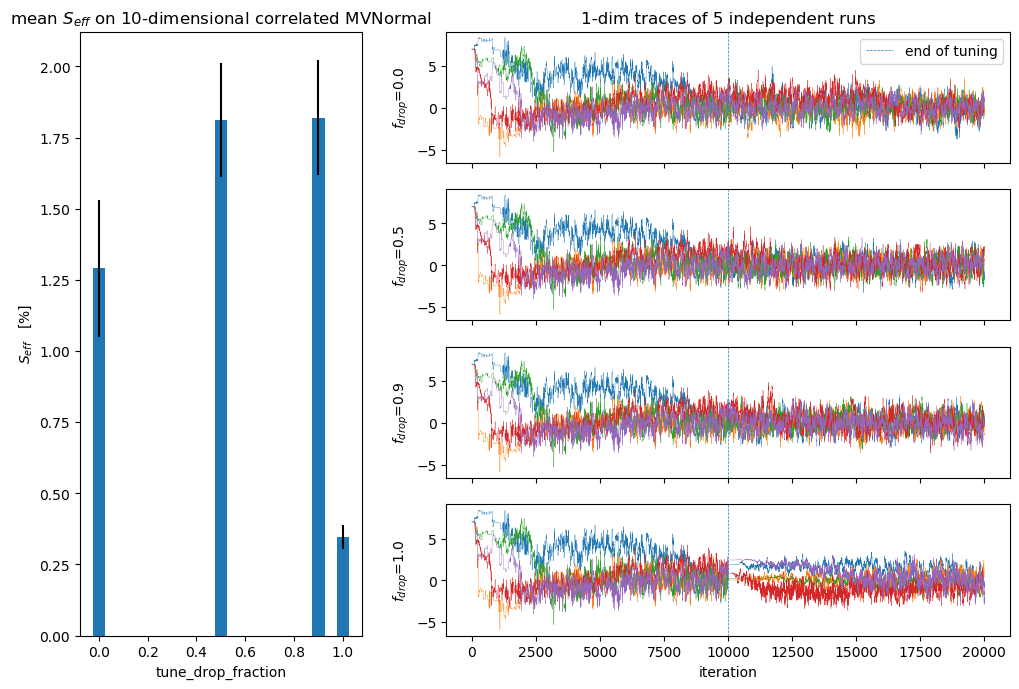

In [6]:
df_temp = df_results.ess.unstack('r').T

fig = plt.figure(dpi=100, figsize=(12,8))
gs = gridspec.GridSpec(4, 2, width_ratios=[1,2])
ax_left = plt.subplot(gs[:,0])
ax_right_bottom = plt.subplot(gs[3,1])
axs_right = [
    plt.subplot(gs[0,1], sharex=ax_right_bottom),
    plt.subplot(gs[1,1], sharex=ax_right_bottom),
    plt.subplot(gs[2,1], sharex=ax_right_bottom),
    ax_right_bottom,
]
for ax in axs_right[:-1]:
    plt.setp(ax.get_xticklabels(), visible=False)

ax_left.bar(
    x = df_temp.columns,
    height=df_temp.mean() / N_draws * 100,
    width=0.05,
    yerr=df_temp.sem() / N_draws * 100
)
ax_left.set_xlabel('tune_drop_fraction')
ax_left.set_ylabel('$S_{eff}$   [%]')

# traceplots
for ax, drop_fraction in zip(axs_right, df_temp.columns):
    ax.set_ylabel('$f_{drop}$=' + f'{drop_fraction}')
    for r, trace in enumerate(df_results.loc[(drop_fraction)].trace):
        ax.plot(trace.x[:,0], linewidth=0.25)
    ax.axvline(N_tune, linestyle='--', linewidth=0.5, label='end of tuning')
axs_right[0].legend()

axs_right[0].set_title(f'1-dim traces of {N_runs} independent runs')
ax_left.set_title('mean $S_{eff}$ on ' + f'{D}-dimensional correlated MVNormal')
ax_right_bottom.set_xlabel('iteration')
plt.show()

## Autocorrelation
A diagnostic measure for the effect we can see above is the autocorrelation in the sampling phase.

When the entire tuning history is dropped, the chain has to diverge from its current position back into the typical set, but without the lambda-swing-in trick, it takes much longer.

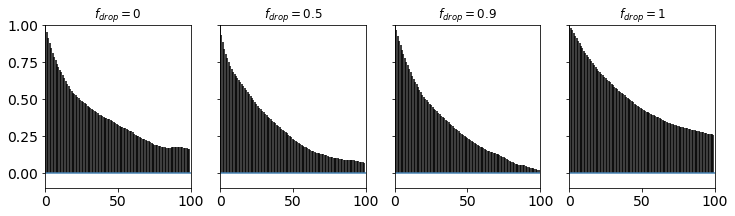

In [7]:
fig, axs = plt.subplots(ncols=4, figsize=(12,3), sharey='row')
for ax, drop_fraction in zip(axs, (0, 0.5, 0.9, 1)):
    az.plot_autocorr(df_results.loc[(drop_fraction, 0), 'trace'][N_tune:].x.T, ax=ax)
    ax.set_title('$f_{drop}=$' + f'{drop_fraction}')
ax.set_ylim(-0.1,1)
ax.set_ylim()
plt.show()

## Acceptance Rate
The rolling mean over the `'accepted'` sampler stat shows that by dropping the tuning history, the acceptance rate shoots up to almost 100 %. High acceptance rates happen when the proposals are too narrow, as we can see up in the traceplot.

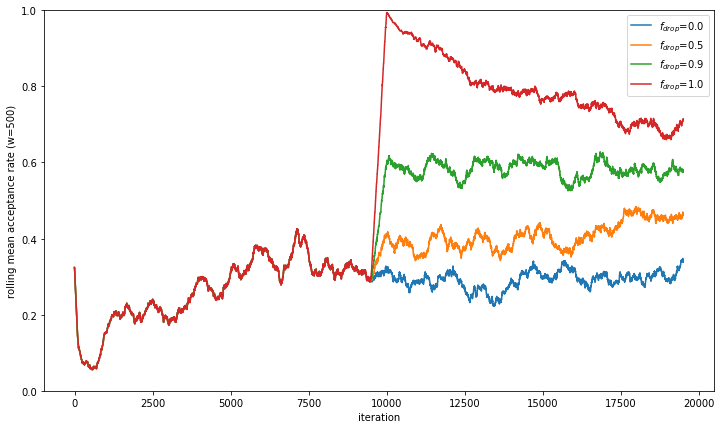

In [8]:
fig, ax = plt.subplots(ncols=1, figsize=(12,7), sharey='row')

for drop_fraction in df_temp.columns:
    S = df_results.loc[(drop_fraction, 0), 'trace'].get_sampler_stats('accepted', combine=False)
    for c in range(trace.nchains):
        ax.plot(
            pd.Series(S).rolling(window=500).mean().iloc[500-1:].values,
            label='$f_{drop}$=' + f'{drop_fraction}'
        )
ax.set_xlabel('iteration')
ax.legend()
ax.set_ylabel('rolling mean acceptance rate (w=500)')
plt.ylim(0, 1)
plt.show()

## Inspecting the Sampler Stats
With the following widget, you can explore the sampler stats to better understand the tuning phase.

Check out the `lambda` and rolling mean of `accepted` sampler stats to see how their interaction improves initial convergece.

In [9]:
def plot_stat(*, sname:str='accepted', rolling=True):
    fig, ax = plt.subplots(ncols=1, figsize=(12,7), sharey='row')
    f_drop_to_color = {
        1:'blue',
        0.9:'green',
        0.5:'orange',
        0:'red',
    }
    for row in df_results.reset_index().itertuples():
        S = row.trace.get_sampler_stats(sname, combine=False)
        for c in range(row.trace.nchains):
            y = pd.Series(S).rolling(window=500).mean().iloc[500-1:].values if rolling else S
            ax.plot(
                y,
                color=f_drop_to_color[row.drop_fraction],
                linewidth=0.5
            )
    for f_drop, color in f_drop_to_color.items():
        ax.plot([], [], label='$f_{drop}=$' + f'{f_drop}', color=color)
    ax.set_xlabel('iteration')
    ax.legend()
    ax.set_ylabel(sname)
    return

ipywidgets.interact_manual(
    plot_stat,
    sname=df_results.trace[0,0].stat_names,
    rolling=True
);

interactive(children=(Dropdown(description='sname', index=3, options=('accept', 'lambda', 'scaling', 'accepted…